In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
titanic=pd.read_csv('passenger.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,21,0,1,"Hari, Mr.harikishan",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
2,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
3,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
4,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S


In [6]:
titanic.shape

(850, 12)

<Axes: xlabel='Survived', ylabel='count'>

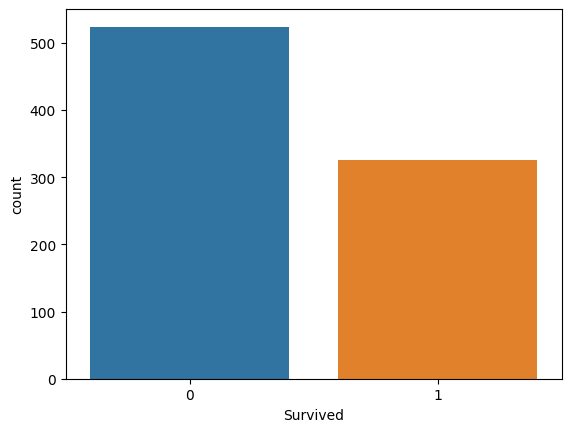

In [7]:
sns.countplot(x='Survived', data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

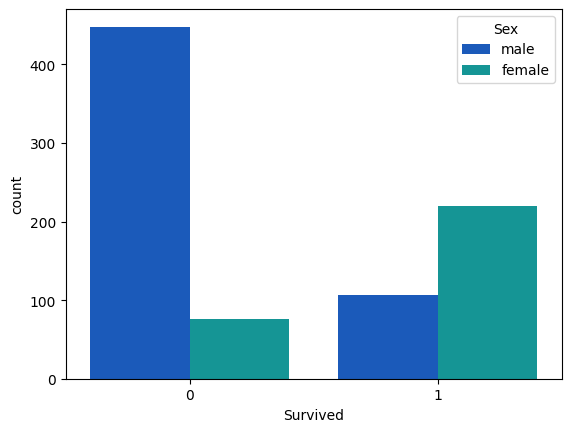

In [8]:
sns.countplot(x='Survived',hue='Sex', data=titanic, palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

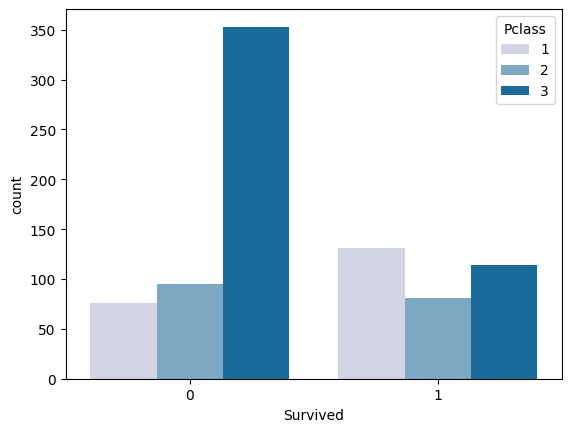

In [9]:
sns.countplot(x='Survived',hue='Pclass', data=titanic, palette='PuBu')

<Axes: ylabel='Frequency'>

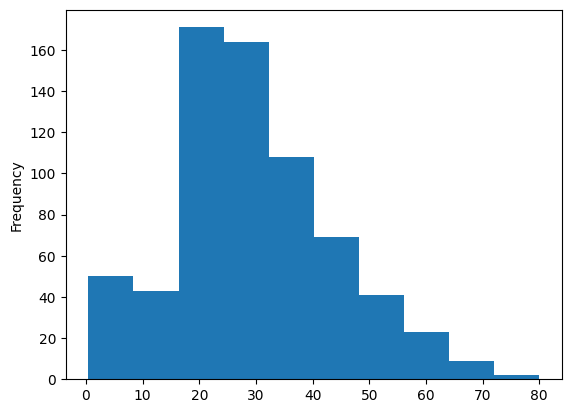

In [10]:
titanic['Age'].plot.hist()

<Axes: ylabel='Frequency'>

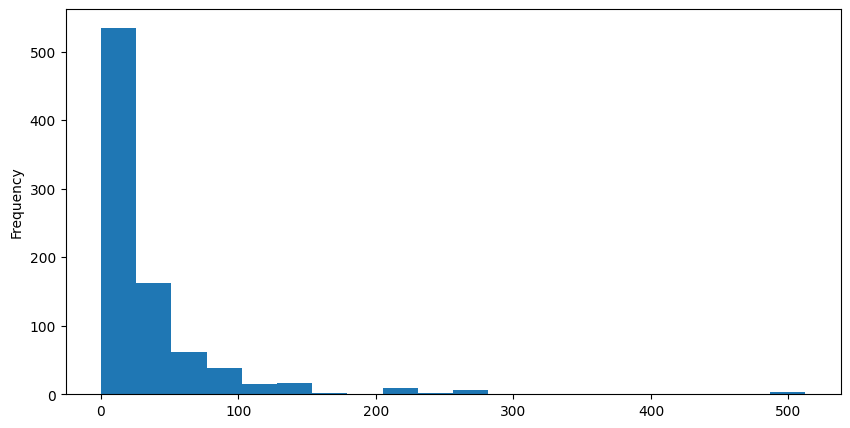

In [11]:
titanic['Fare'].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

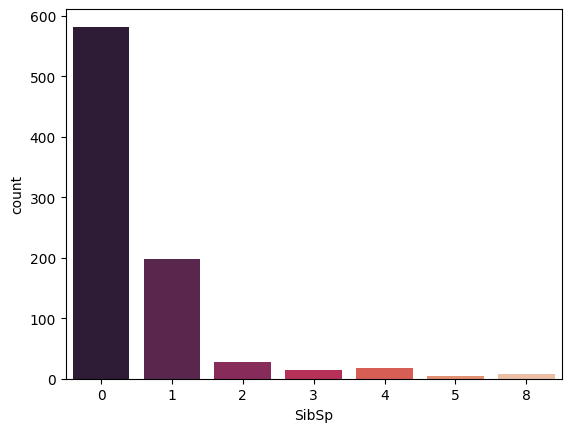

In [12]:
sns.countplot(x='SibSp', data=titanic, palette='rocket')

<Axes: ylabel='Frequency'>

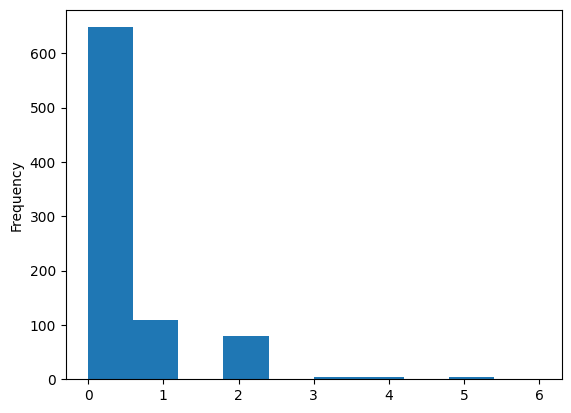

In [13]:
titanic['Parch'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

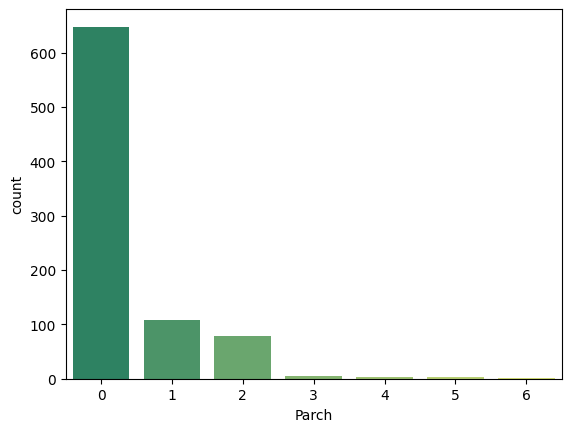

In [14]:
sns.countplot(x='Parch', data=titanic, palette='summer')

In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          656
Embarked         2
dtype: int64

<Axes: >

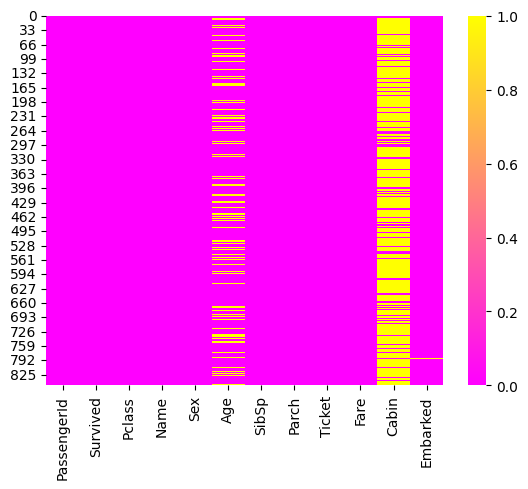

In [16]:
sns.heatmap(titanic.isnull(), cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

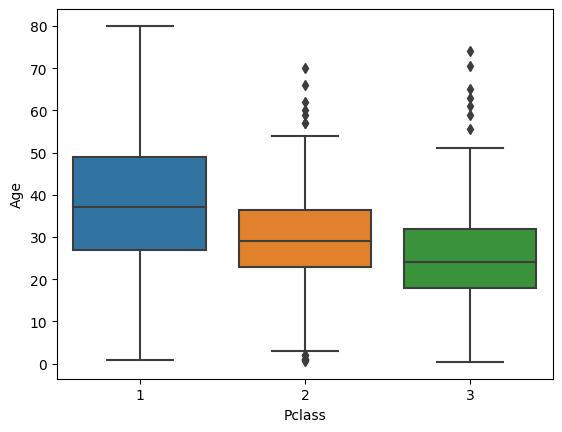

In [17]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,21,0,1,"Hari, Mr.harikishan",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
2,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
3,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
4,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S


In [19]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<Axes: >

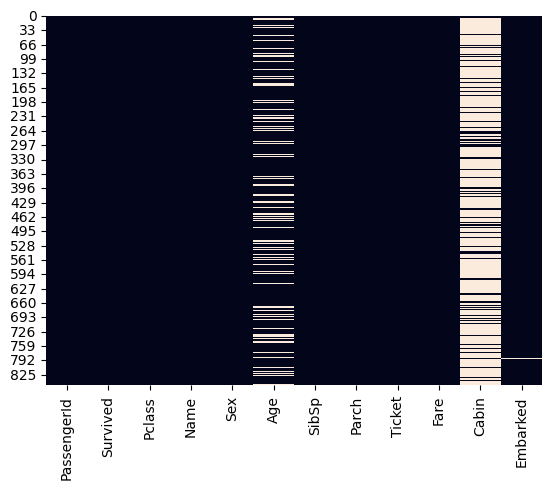

In [21]:
sns.heatmap(titanic.isnull(), cbar=False)

In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          656
Embarked         2
dtype: int64

In [23]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,21,0,1,"Hari, Mr.harikishan",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.00,D56,S


In [24]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,False,True
1,False,True
2,True,False
3,False,True
4,True,False


In [25]:
sex= pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head(3)

,male
0,True
1,True
2,False


In [26]:
embark= pd.get_dummies(titanic['Embarked'])

In [27]:
embark.head(3)

,C,Q,S
0,False,False,True
1,False,False,True
2,False,True,False


In [28]:
embark=pd.get_dummies(titanic['Embarked'], drop_first=True)

In [29]:
embark.head(3)

,Q,S
0,False,True
1,False,True
2,True,False


In [30]:
Pcl=pd.get_dummies(titanic['Pclass'], drop_first=True)
Pcl.head(3)

,2,3
0,False,False
1,True,False
2,False,True


In [31]:
titanic=pd.concat([titanic, sex, embark, Pcl], axis=1)

In [32]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,21,0,1,"Hari, Mr.harikishan",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True,False,False
1,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,True,False,True,True,False
2,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,False,True,False,False,True


In [33]:
titanic.drop(['Name','PassengerId','Pclass',"Ticket",'Sex','Embarked'], axis=1, inplace=True)

In [34]:
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
0,0,22.0,1,0,7.2500,NaN,True,False,True,False,False
1,1,34.0,0,0,13.0000,D56,True,False,True,True,False
2,1,15.0,0,0,8.0292,NaN,False,True,False,False,True


In [35]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=4)

In [53]:
print(X.shape, X_train.shape,X_test.shape)

(850, 10) (569, 10) (281, 10)


In [45]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

LOGISTIC REGRESSION 

In [39]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [ ]:
lm.fit(X_train, y_train)

In [47]:
from sklearn.metrics import classification_report

In [48]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, prediction)

In [50]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, prediction)